# Proyecto - Seminario de Sistemas 2 - Fase 2
# EDA Monovariable y Multivariable

## Lectura de Datos (SQL Server -> Pandas Dataframe) + Importaciones

In [81]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


In [82]:
# Configuración de conexión a SQL Server
server = 'FROI-PC\\SQLEXPRESS'
database = 'covid-data'
trusted_connection = 'yes'

# Especificar el controlador de pyodbc en la cadena de conexión
conn_str = f'mssql+pyodbc://{server}/{database}?trusted_connection={trusted_connection}&driver=ODBC+Driver+17+for+SQL+Server'

# Crear el motor de SQLAlchemy
engine = create_engine(conn_str)

# Consulta SQL para extraer datos
sql_query_municipality = 'SELECT * FROM MUNICIPALITY'
sql_query_department = 'SELECT * FROM DEPARTMENT'
sql_query_municipality_deaths = 'SELECT MD.municipality_code, MD.date, MD.total_deaths, MD.day_deaths, M.name AS \'municipality_name\', D.name AS \'department_name\' FROM MUNICIPALITY_DEATHS AS MD LEFT JOIN MUNICIPALITY AS M ON MD.municipality_code=M.code LEFT JOIN DEPARTMENT AS D ON M.department_code=D.code'
sql_query_country_deaths = 'SELECT * FROM COUNTRY_DEATHS'
sql_query_department_population = 'SELECT D.[code] AS DepartmentCode, D.[name] AS DepartmentName, SUM(M.[population]) AS TotalPopulation FROM [dbo].[DEPARTMENT] D JOIN [dbo].[MUNICIPALITY] M ON D.[code] = M.[department_code] GROUP BY D.[code], D.[name] ORDER BY CONVERT(INT, D.[code]);'

# Ejecutar la consulta y cargar los resultados en DataFrames
df_municipality = pd.read_sql(sql_query_municipality, engine)
df_department = pd.read_sql(sql_query_department, engine)
df_municipality_deaths = pd.read_sql(sql_query_municipality_deaths, engine)
df_country_deaths = pd.read_sql(sql_query_country_deaths, engine)
df_department_population = pd.read_sql(sql_query_department_population, engine)

# Asegurar que la columna 'date' sea de tipo datetime64[ns]
df_country_deaths['date'] = pd.to_datetime(df_country_deaths['date'])

# Filtrar registros directamente en el mismo DataFrame
df_country_deaths = df_country_deaths[df_country_deaths['date'] > '2020-03-15']

In [83]:
df_municipality.head(4)
df_municipality.tail(4)

code                    name department_code  population
333  921                  GENOVA               9       45162
334  922       FLORES COSTA CUCA               9       23851
335  923            LA ESPERANZA               9       24199
336  924  PALESTINA DE LOS ALTOS               9       20299

In [84]:
df_department.head(4)
df_department.tail(4)

code            name
18    6      SANTA ROSA
19    7          SOLOLA
20    8     TOTONICAPAN
21    9  QUETZALTENANGO

In [85]:
df_municipality_deaths.head(4)
df_municipality_deaths.tail(4)

municipality_code       date  total_deaths  day_deaths  \
85931               924 2020-12-28             0         138   
85932               924 2020-12-29             0         132   
85933               924 2020-12-30             0         846   
85934               924 2020-12-31             0         879   

            municipality_name department_name  
85931  PALESTINA DE LOS ALTOS  QUETZALTENANGO  
85932  PALESTINA DE LOS ALTOS  QUETZALTENANGO  
85933  PALESTINA DE LOS ALTOS  QUETZALTENANGO  
85934  PALESTINA DE LOS ALTOS  QUETZALTENANGO

In [86]:
df_country_deaths.head(4)
df_country_deaths.tail(4)

date country_code  new_cases  cumulative_cases  new_deaths  \
357 2020-12-28           GT        138            135309           5   
358 2020-12-29           GT        132            135441           5   
359 2020-12-30           GT        846            136287           8   
360 2020-12-31           GT        879            137166          22   

     cumulative_deaths  
357               4768  
358               4773  
359               4781  
360               4803

In [87]:
df_department_population.tail(4)

DepartmentCode DepartmentName  TotalPopulation
18             19         ZACAPA           267718
19             20     CHIQUIMULA           441579
20             21         JALAPA           394234
21             22        JUTIAPA           546005

In [88]:
df_country_deaths.dtypes

date                 datetime64[ns]
country_code                 object
new_cases                     int64
cumulative_cases              int64
new_deaths                    int64
cumulative_deaths             int64
dtype: object

## EDA Monovariable

### Análisis de Nuevas Muertes

In [89]:
# Estadísticas Descriptivas
describe = df_country_deaths['new_deaths'].describe()
print(f"Estadísticas descriptivas\n{describe}\n")

# Estadísticas de Conteo
count = df_country_deaths['new_deaths'].count()
print(f"Estadísticas de Conteo\n{count}\n")

# Valores únicos
unique = df_country_deaths['new_deaths'].unique()
nunique = df_country_deaths['new_deaths'].nunique()
print(f"Valores Únicos\n{unique}")
print(f"Valores Únicos (cantidad): {nunique}\n")
# Promedio
mean = df_country_deaths['new_deaths'].mean()
print(f"Promedio\n{mean}\n")

# Cuartiles
# Mediana (50%)
median_new_deaths = df_country_deaths['new_deaths'].median()

# Cuartiles (25%, 75%)
q1_new_deaths = df_country_deaths['new_deaths'].quantile(0.25)
q3_new_deaths = df_country_deaths['new_deaths'].quantile(0.75)

print("\nMediana para 'new_deaths':", median_new_deaths)
print("\nCuartil 25% para 'new_deaths':", q1_new_deaths)
print("\nCuartil 75% para 'new_deaths':", q3_new_deaths)

Estadísticas descriptivas
count    288.000000
mean      16.684028
std       14.775468
min        0.000000
25%        4.000000
50%       14.000000
75%       25.250000
max       61.000000
Name: new_deaths, dtype: float64

Estadísticas de Conteo
288

Valores Únicos
[ 0  1  2  3  5  4 12 10  6  8  7 20 15 58 14 22 27 18 17 16 19 34 31 35
 49 21 44 26 37 40 23 39 47 33 25 48 54 53 29 42 59 30 32 57 38 24 11 45
 28 13  9 61 41]
Valores Únicos (cantidad): 53

Promedio
16.68402777777778


Mediana para 'new_deaths': 14.0

Cuartil 25% para 'new_deaths': 4.0

Cuartil 75% para 'new_deaths': 25.25


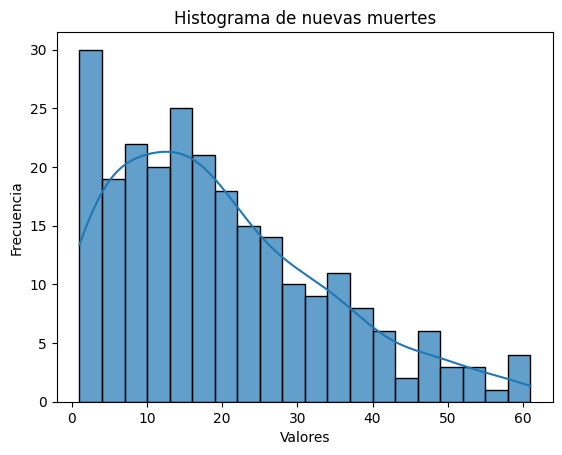

In [111]:
# Filtra los valores mayores que cero
filtered_data = df_country_deaths['new_deaths'][df_country_deaths['new_deaths'] > 0]

# Crea el histograma con la transformación logarítmica
sns.histplot(filtered_data, bins=20, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de nuevas muertes')
plt.show()

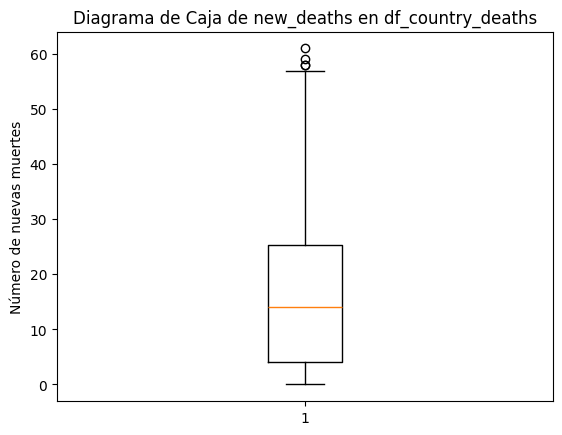

In [91]:
plt.boxplot(df_country_deaths['new_deaths'])

plt.title('Diagrama de Caja de new_deaths en df_country_deaths')
plt.ylabel('Número de nuevas muertes')
plt.show()

#### Observaciones
- El valor promedio de new_deaths es de 15 (redondeado)
- Los valores más frecuentes de esta variable son valores relativamente bajos (entre 0 y 20)
- Que los valores más frecuentes sean relativamente bajos se puede visualizar tanto en el histograma como en el diagrama de caja, ya que se puede visualizar que los valores que están entre el cuartil 3 y el 1 son precisamente los que componen la caja

### Análisis de Cantidad de Muertes Acumuladas

In [92]:
# Estadísticas Descriptivas
describe = df_country_deaths['cumulative_deaths'].describe()
print(f"Estadísticas descriptivas\n{describe}\n")

# Estadísticas de Conteo
count = df_country_deaths['cumulative_deaths'].count()
print(f"Estadísticas de Conteo\n{count}\n")

# Valores únicos
unique = df_country_deaths['cumulative_deaths'].nunique()
print(f"Valores Únicos\n{unique}\n")

# Promedio
mean = df_country_deaths['cumulative_deaths'].mean()
print(f"Promedio\n{mean}\n")

# Cuartiles
# Mediana (50%)
median_new_deaths = df_country_deaths['cumulative_deaths'].median()

# Cuartiles (25%, 75%)
q1_new_deaths = df_country_deaths['cumulative_deaths'].quantile(0.25)
q3_new_deaths = df_country_deaths['cumulative_deaths'].quantile(0.75)

print("\nMediana para 'cumulative_deaths':", median_new_deaths)
print("\nCuartil 25% para 'cumulative_deaths':", q1_new_deaths)
print("\nCuartil 75% para 'cumulative_deaths':", q3_new_deaths)

Estadísticas descriptivas
count     288.000000
mean     2017.288194
std      1669.618975
min         0.000000
25%        77.000000
50%      2204.000000
75%      3542.250000
max      4803.000000
Name: cumulative_deaths, dtype: float64

Estadísticas de Conteo
288

Valores Únicos
249

Promedio
2017.2881944444443


Mediana para 'cumulative_deaths': 2204.0

Cuartil 25% para 'cumulative_deaths': 77.0

Cuartil 75% para 'cumulative_deaths': 3542.25


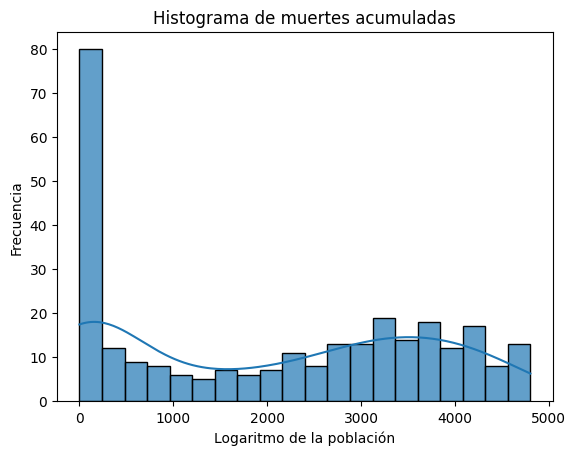

In [93]:
# Filtra los valores mayores que cero
filtered_data = df_country_deaths['cumulative_deaths'][df_country_deaths['cumulative_deaths'] > 0]

# Crea el histograma con la transformación logarítmica
sns.histplot(filtered_data, bins=20, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('Logaritmo de la población')
plt.ylabel('Frecuencia')
plt.title('Histograma de muertes acumuladas')
plt.show()

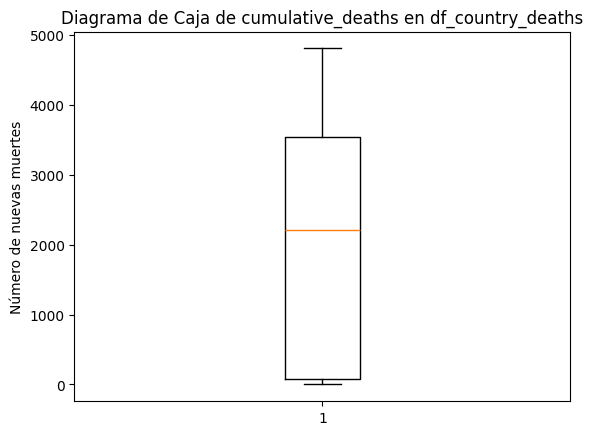

In [94]:
plt.boxplot(df_country_deaths['cumulative_deaths'])

plt.title('Diagrama de Caja de Número de Nuevas Muertes')
plt.ylabel('Número de nuevas muertes')
plt.show()

#### Observaciones
- En la variable de muertes acumuladas se puede ver una mejor distribución de los datos, ya que los cuartiles están un poco más proporcionados exceptuando los datos del primer cuartil. Esto se puede deber a que por mucho tiempo la población Guatemalteca acató medidas de prevención de tal forma que no hubieron muchos contagios al inicio.
- El promedio es de 2017 un valor que puede ser considerado muy alto, sin embargo, debido a que se trata de estadísticas acumulativas, es entendible que este valor sea alto.
- El total de registros es de 288 los cuales concuerdan con los días en que se registraron muertes por covid y aquellos datos que pasaron la limpieza de datos hecha anteriormente

### Análisis de Población en los Municipios

In [95]:
# Estadísticas Descriptivas
describe = df_municipality['population'].describe()
print(f"Estadísticas descriptivas\n{describe}\n")

# Estadísticas de Conteo
count = df_municipality['population'].count()
print(f"Estadísticas de Conteo\n{count}\n")

# Valores únicos
unique = df_municipality['population'].nunique()
print(f"Valores Únicos\n{unique}\n")

# Promedio
mean = df_municipality['population'].mean()
print(f"Promedio\n{mean}\n")

# Cuartiles
# Mediana (50%)
median_new_deaths = df_municipality['population'].median()

# Cuartiles (25%, 75%)
q1_new_deaths = df_municipality['population'].quantile(0.25)
q3_new_deaths = df_municipality['population'].quantile(0.75)

print("\nMediana para 'cumulative_deaths':", median_new_deaths)
print("\nCuartil 25% para 'cumulative_deaths':", q1_new_deaths)
print("\nCuartil 75% para 'cumulative_deaths':", q3_new_deaths)

Estadísticas descriptivas
count    3.370000e+02
mean     4.997144e+04
std      8.158246e+04
min      2.563000e+03
25%      1.746500e+04
50%      3.091200e+04
75%      5.852600e+04
max      1.205668e+06
Name: population, dtype: float64

Estadísticas de Conteo
337

Valores Únicos
336

Promedio
49971.44213649852


Mediana para 'cumulative_deaths': 30912.0

Cuartil 25% para 'cumulative_deaths': 17465.0

Cuartil 75% para 'cumulative_deaths': 58526.0


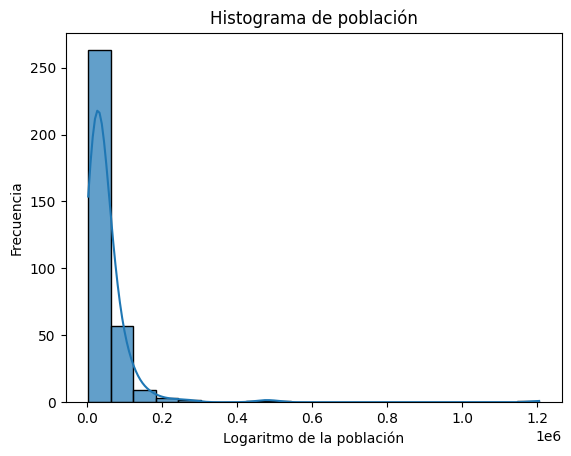

In [96]:
filtered_data = df_municipality['population'][df_municipality['population'] > 0]

# Crea el histograma con la transformación logarítmica
sns.histplot(filtered_data, bins=20, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('Logaritmo de la población')
plt.ylabel('Frecuencia')
plt.title('Histograma de población')
plt.show()

- El diagrama posee un sesgo, por lo cuál, se hará una transformación logarítmica

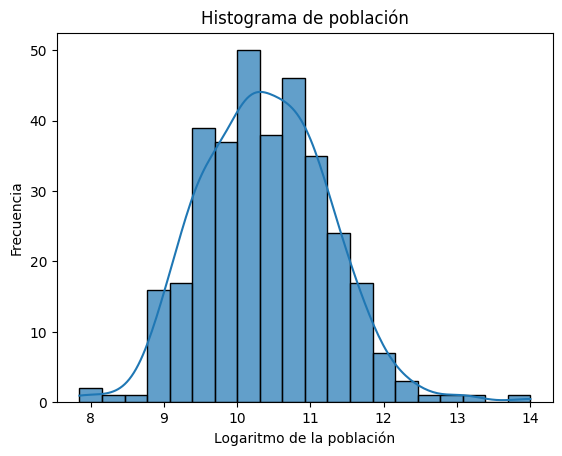

In [97]:
# Filtra los valores mayores que cero
filtered_data = df_municipality['population'][df_municipality['population'] > 0]

# Crea el histograma con la transformación logarítmica
sns.histplot(np.log(filtered_data), bins=20, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('Logaritmo de la población')
plt.ylabel('Frecuencia')
plt.title('Histograma de población')
plt.show()

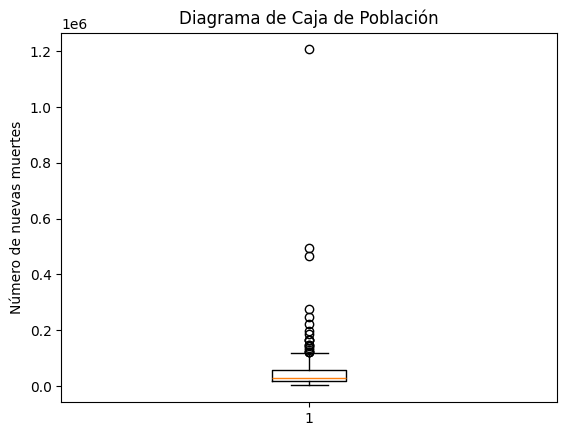

In [112]:
plt.boxplot(df_municipality['population'])

plt.title('Diagrama de Caja de Población')
plt.ylabel('Número de nuevas muertes')
plt.show()

#### Observaciones
- Probablemente la estadística más controversial, ya que los valores tienen una separación muy grande. Esto se debe a la población en el país de Guatemala, un número muy grande de habitantes suele concentrase en ciudades muy específicas como lo pueden ser la Ciudad de Guatemala, Mixco, Villa Nueva o Quetzaltenango.
- Si comparamos la población de los municipios anteriormente mencionados con algunos otros municipios del área rural, hay una diferencia de población muy grande. Y es importante tomar en cuenta que el área rural comprende la mayor parte del territorio de la República, por lo cual es entendible que tanto la gráfica de caja como la gráfica inicial del histograma posean dicha forma.
- Como se mencionó, la gráfica inicial que tenía el histograma tenía una forma extraña, a tal punto que la misma estaba sesgada. Por lo cual se tuvo que aplicar una **transformación logaritmica** para componer la visualización de la misma.

### Diagramas de Barras para Variables cualitativas

## EDA Multivariable

### Gráficas de Dispersión

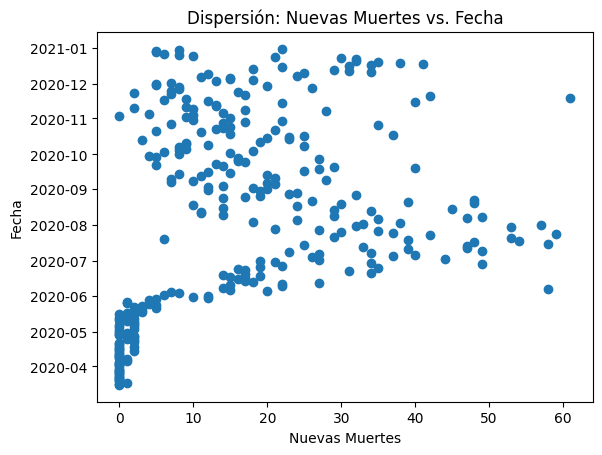

In [99]:
plt.scatter(df_country_deaths['new_deaths'], df_country_deaths['date'])
plt.xlabel('Nuevas Muertes')
plt.ylabel('Fecha')
plt.title('Dispersión: Nuevas Muertes vs. Fecha')
plt.show()

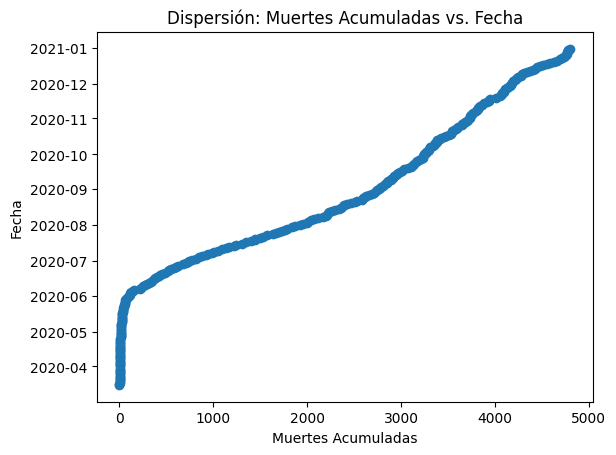

In [100]:
plt.scatter(df_country_deaths['cumulative_deaths'], df_country_deaths['date'])
plt.xlabel('Muertes Acumuladas')
plt.ylabel('Fecha')
plt.title('Dispersión: Muertes Acumuladas vs. Fecha')
plt.show()

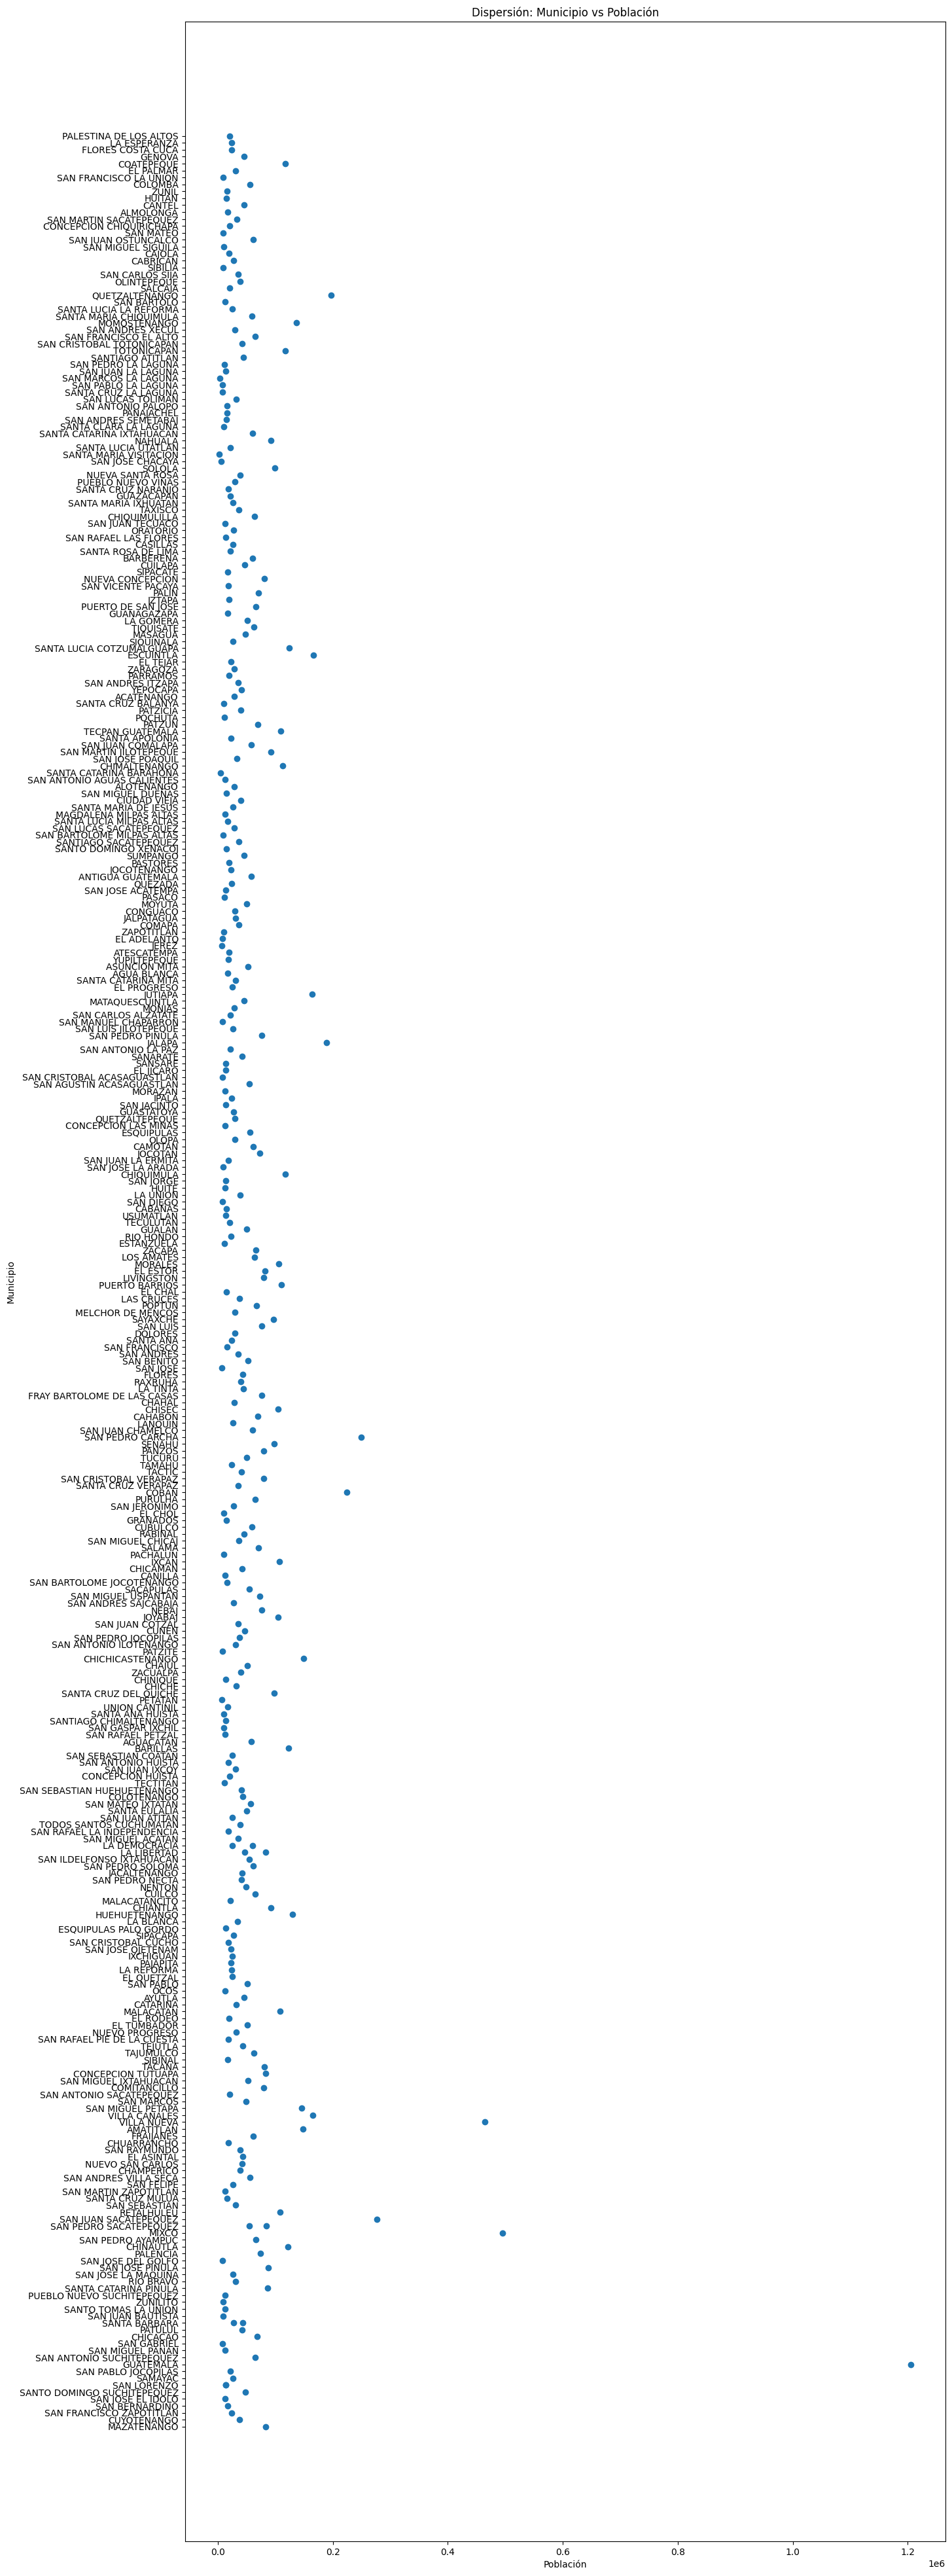

In [101]:
plt.figure(figsize=(15, 50))
plt.scatter(df_municipality['population'], df_municipality['name'])
plt.xlabel('Población')
plt.ylabel('Municipio')
plt.title('Dispersión: Municipio vs Población')
plt.show()

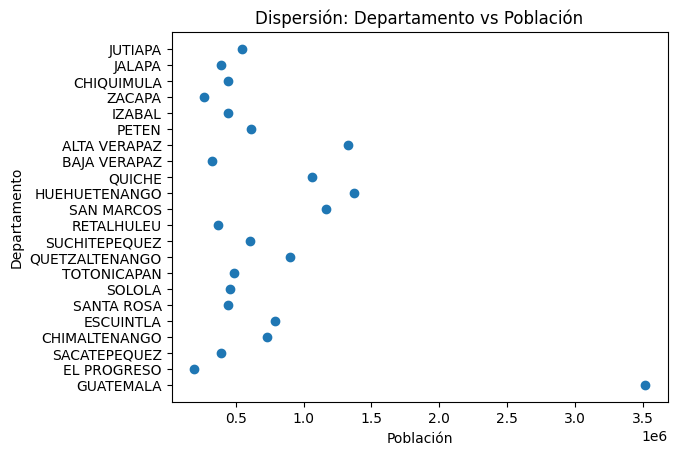

In [102]:
plt.scatter(df_department_population['TotalPopulation'], df_department_population['DepartmentName'])
plt.xlabel('Población')
plt.ylabel('Departamento')
plt.title('Dispersión: Departamento vs Población')
plt.show()

### Gráficas de Barras

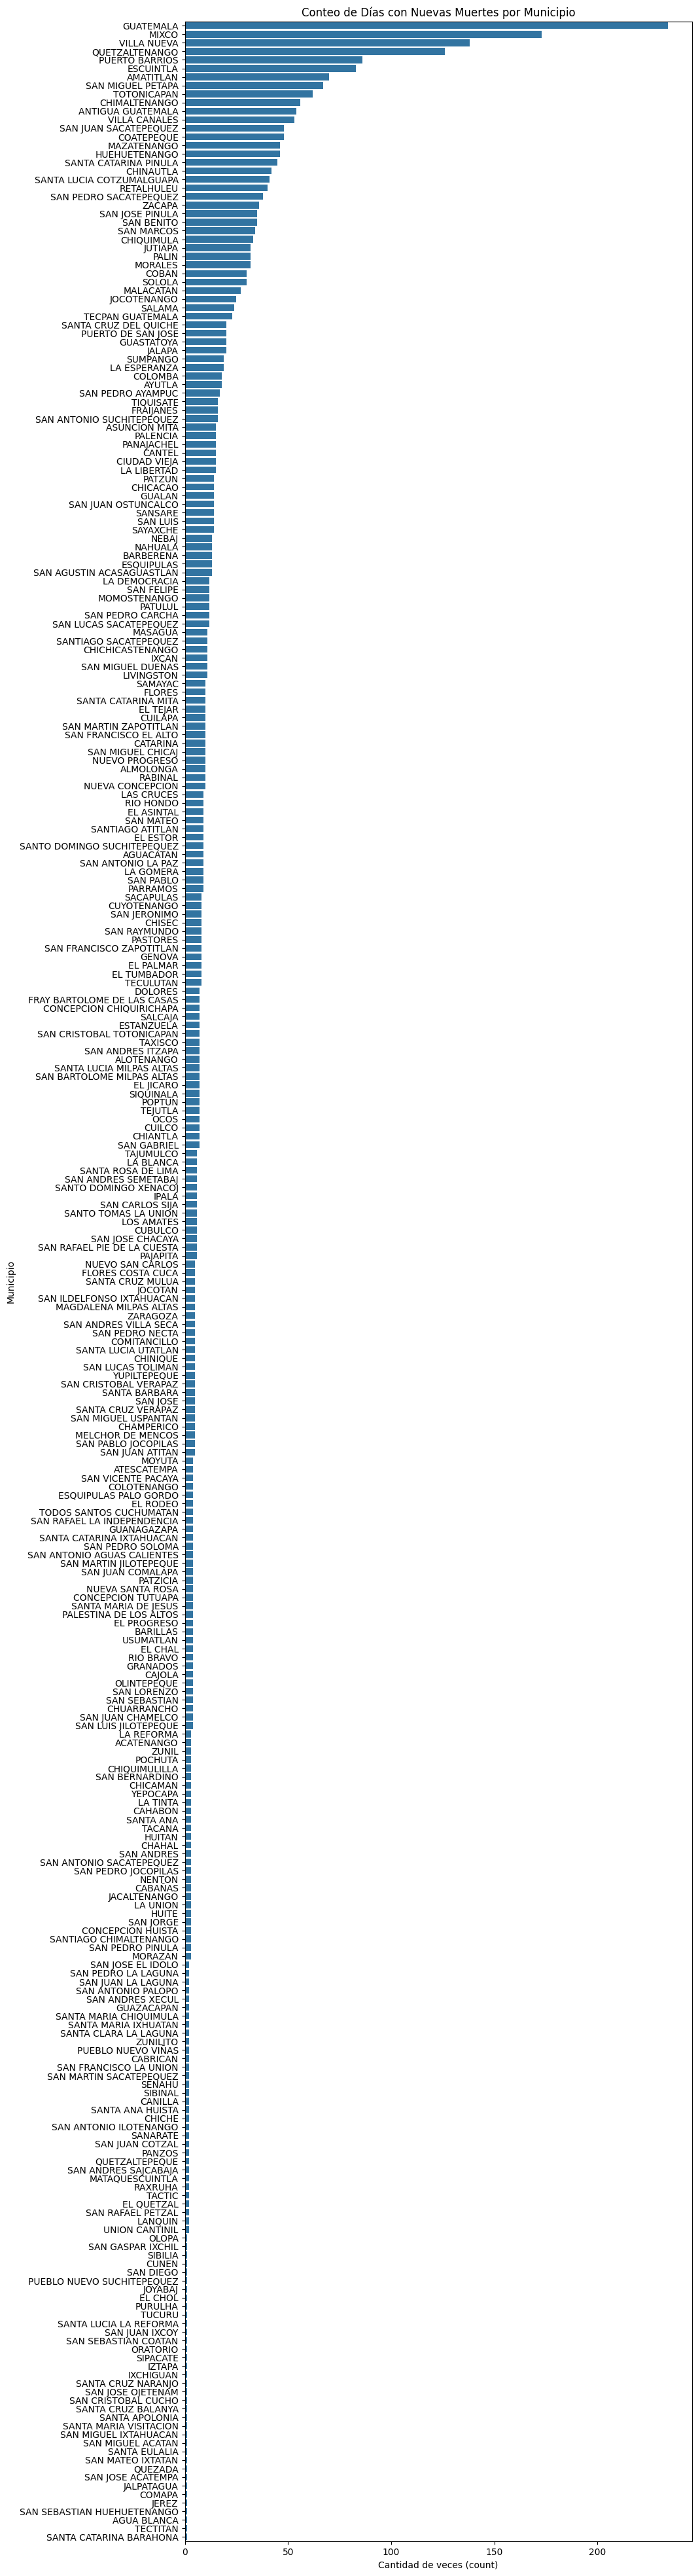

In [103]:
# Filtrar las filas donde total_deaths no es igual a cero
df_filtered = df_municipality_deaths[df_municipality_deaths['total_deaths'] != 0]

# Contar las ocurrencias de cada "name" en el DataFrame filtrado
df_municipality_count = df_filtered['municipality_name'].value_counts().reset_index()
df_municipality_count.columns = ['municipality_name', 'count']

# Crear una gráfica de barras con seaborn
plt.figure(figsize=(10, 50))
sns.barplot(x='count', y='municipality_name', data=df_municipality_count)  # Muestra las 10 primeras para legibilidad

# Añadir etiquetas y título
plt.xlabel('Cantidad de veces (count)')
plt.ylabel('Municipio')
plt.title('Conteo de Días con Nuevas Muertes por Municipio')

# Mostrar el gráfico
plt.show()

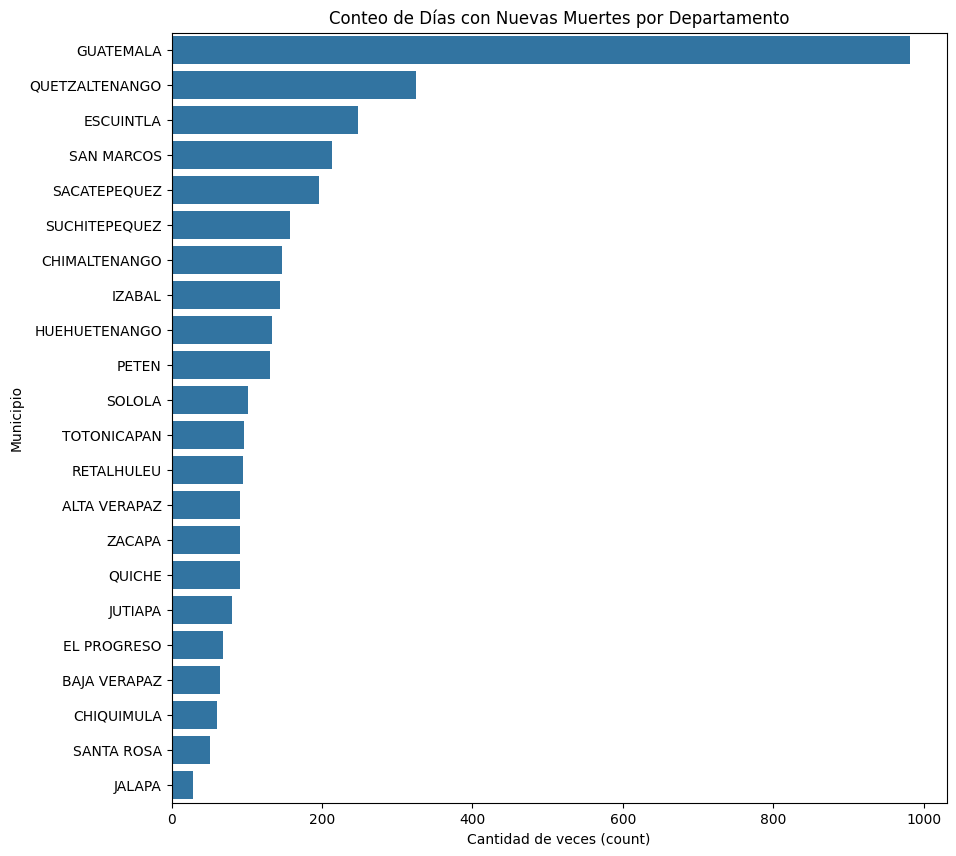

In [104]:
df_filtered = df_municipality_deaths[df_municipality_deaths['total_deaths'] != 0]

# Contar las ocurrencias de cada "name" en el DataFrame filtrado
df_municipality_count = df_filtered['department_name'].value_counts().reset_index()
df_municipality_count.columns = ['department_name', 'count']

# Crear una gráfica de barras con seaborn
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura según tus necesidades
sns.barplot(x='count', y='department_name', data=df_municipality_count)  # Muestra las 10 primeras para legibilidad

# Añadir etiquetas y título
plt.xlabel('Cantidad de veces (count)')
plt.ylabel('Municipio')
plt.title('Conteo de Días con Nuevas Muertes por Departamento')

# Mostrar el gráfico
plt.show()

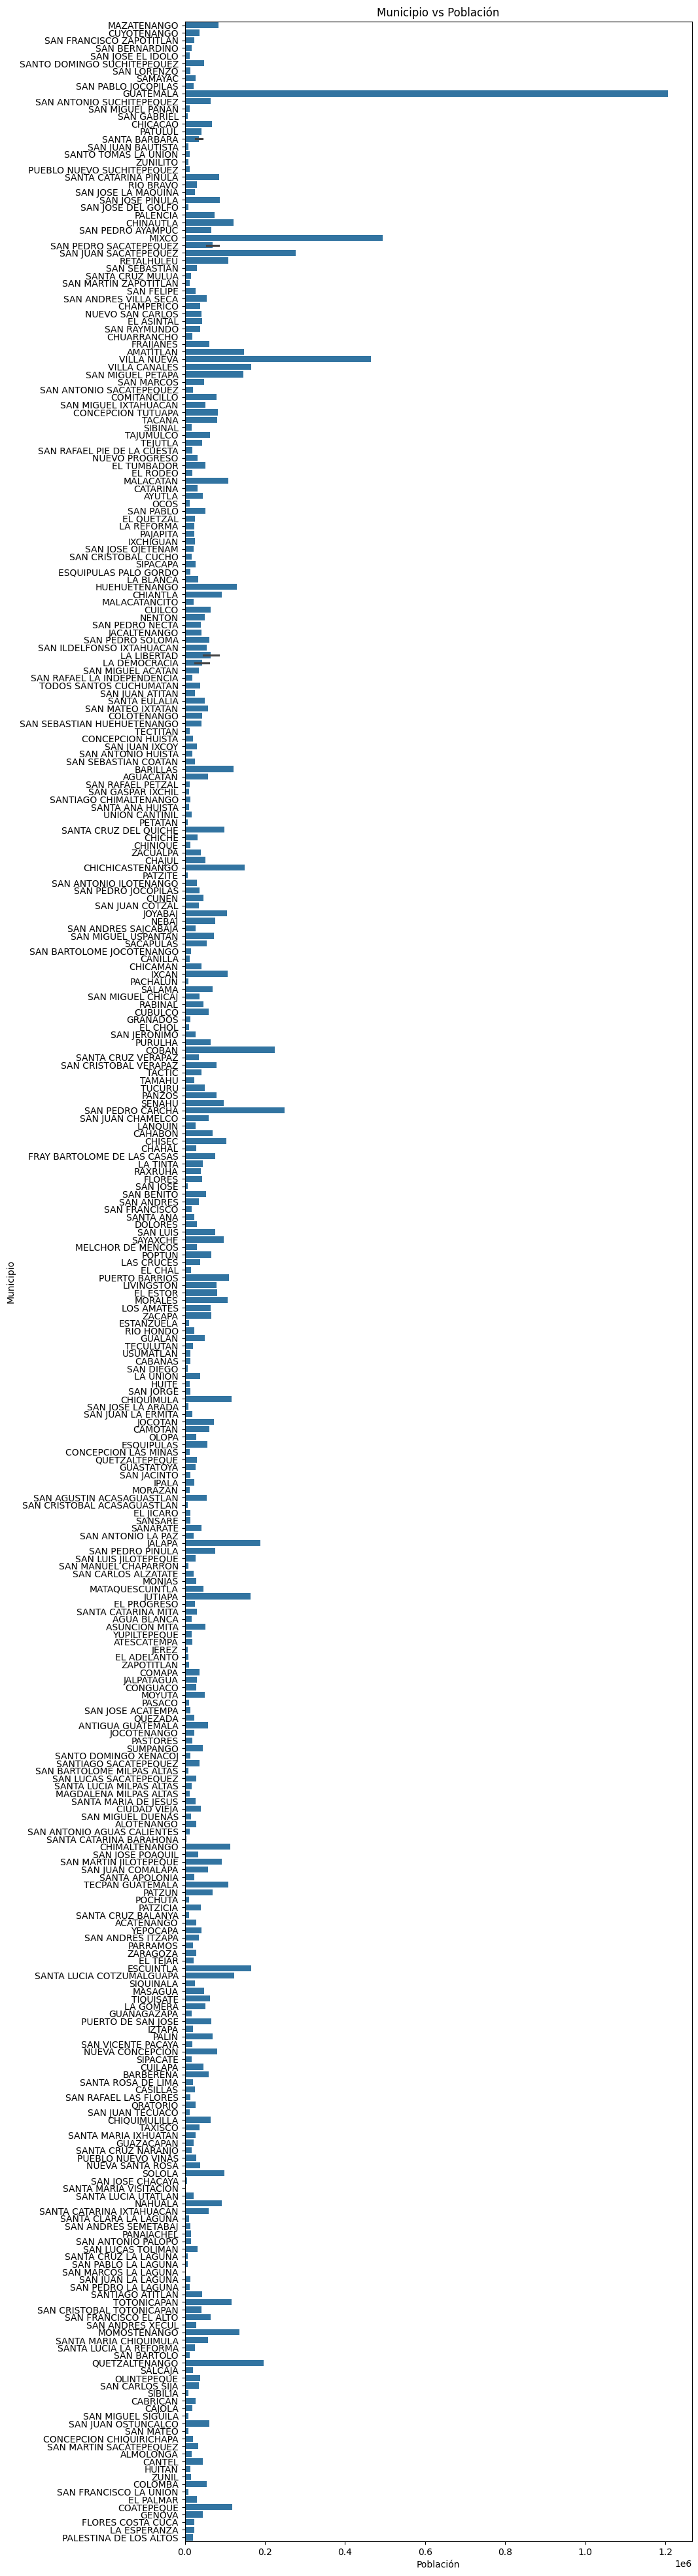

In [105]:
# Crear una gráfica de barras con seaborn
plt.figure(figsize=(10, 50))  # Ajusta el tamaño de la figura según tus necesidades
sns.barplot(x='population', y='name', data=df_municipality)  # Muestra las 10 primeras para legibilidad

# Añadir etiquetas y título
plt.xlabel('Población')
plt.ylabel('Municipio')
plt.title('Municipio vs Población')

# Mostrar el gráfico
plt.show()

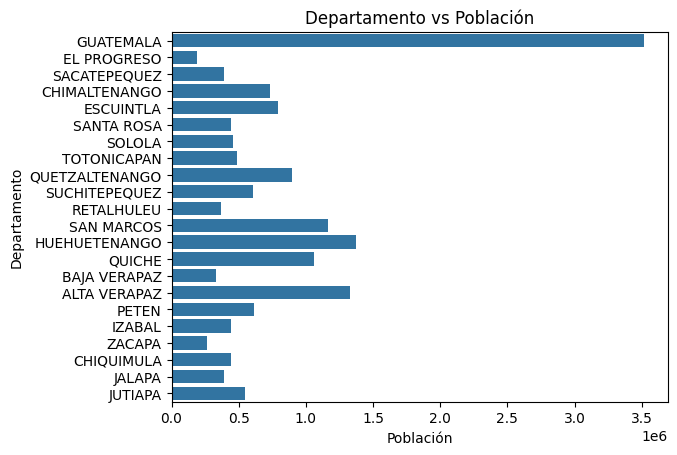

In [106]:
sns.barplot(x='TotalPopulation', y='DepartmentName', data=df_department_population)  # Muestra las 10 primeras para legibilidad

# Añadir etiquetas y título
plt.xlabel('Población')
plt.ylabel('Departamento')
plt.title('Departamento vs Población')

# Mostrar el gráfico
plt.show()

### Mapas de Calor

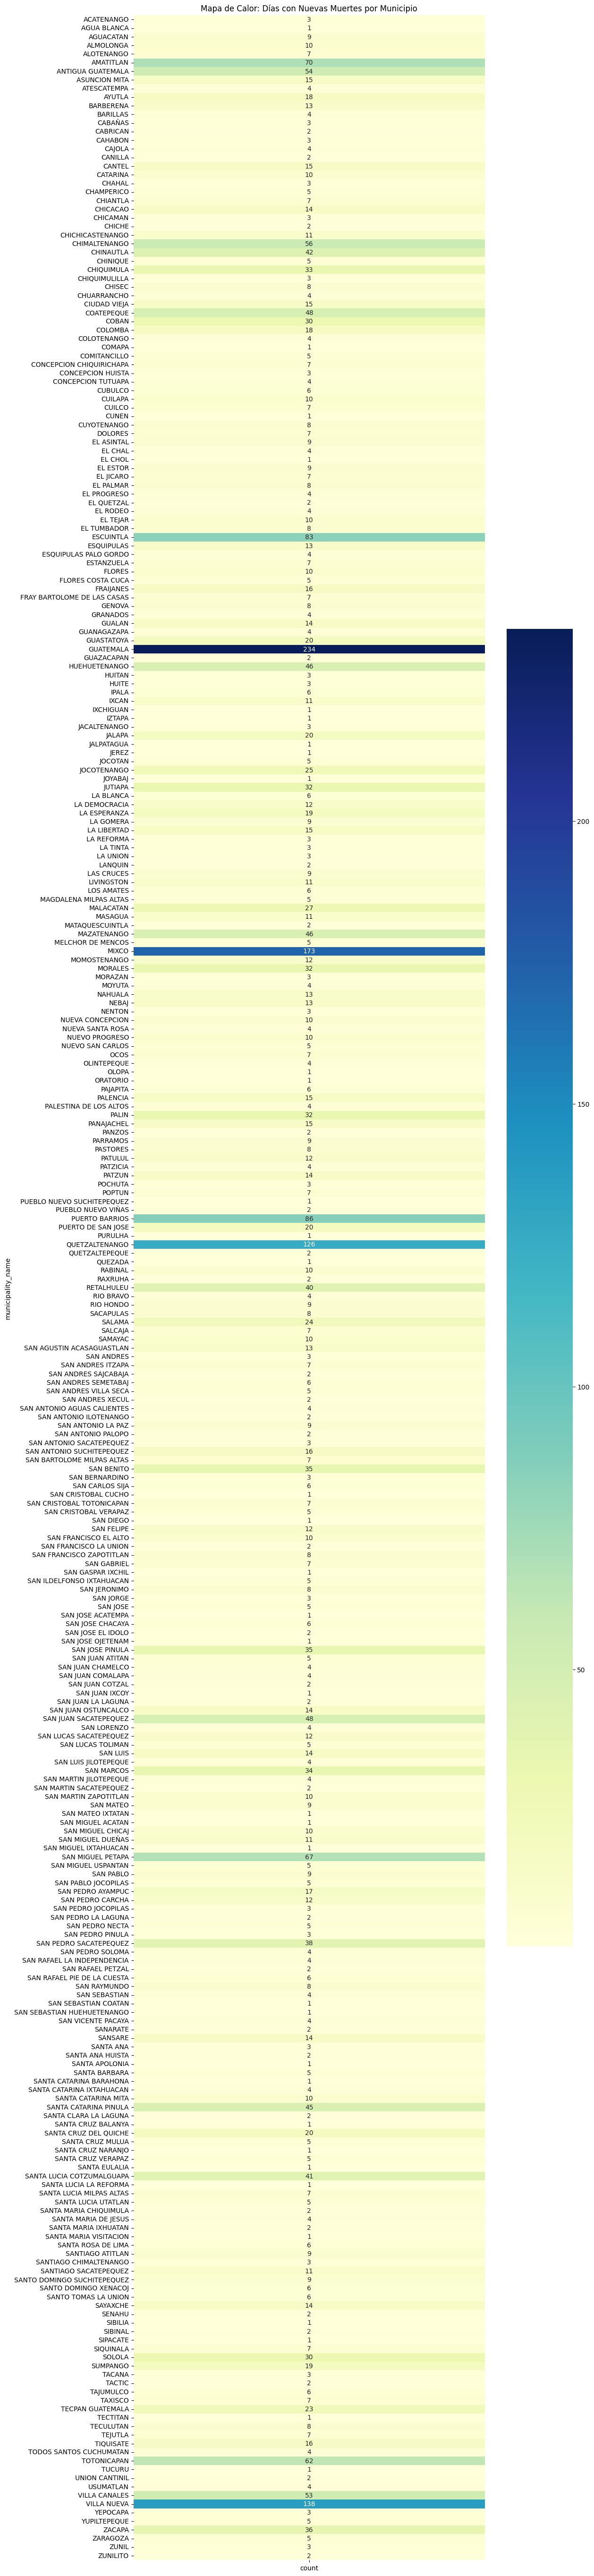

In [107]:
# Contar las ocurrencias de cada "name" en el DataFrame filtrado
df_municipality_count = df_filtered['municipality_name'].value_counts().reset_index()
df_municipality_count.columns = ['municipality_name', 'count']

# Crear un mapa de calor con seaborn
plt.figure(figsize=(12, 70)) 
sns.heatmap(df_municipality_count.pivot_table(index='municipality_name', values='count', aggfunc='sum'), cmap='YlGnBu', annot=True, fmt='g')

# Añadir título
plt.title('Mapa de Calor: Días con Nuevas Muertes por Municipio')

# Mostrar el gráfico
plt.show()

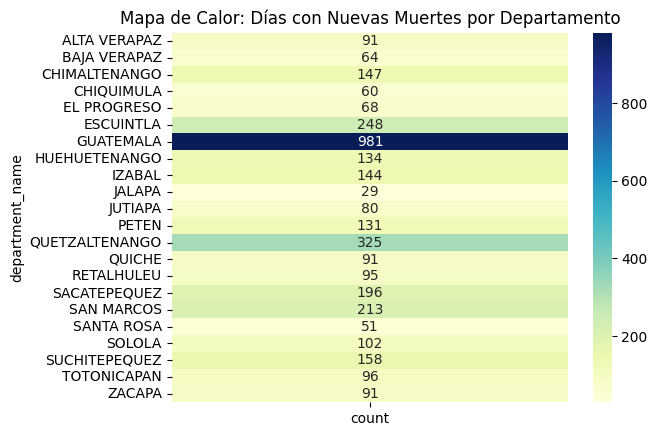

In [108]:

df_municipality_count = df_filtered['department_name'].value_counts().reset_index()
df_municipality_count.columns = ['department_name', 'count']

sns.heatmap(df_municipality_count.pivot_table(index='department_name', values='count', aggfunc='sum'), cmap='YlGnBu', annot=True, fmt='g')

# Añadir título
plt.title('Mapa de Calor: Días con Nuevas Muertes por Departamento')

# Mostrar el gráfico
plt.show()

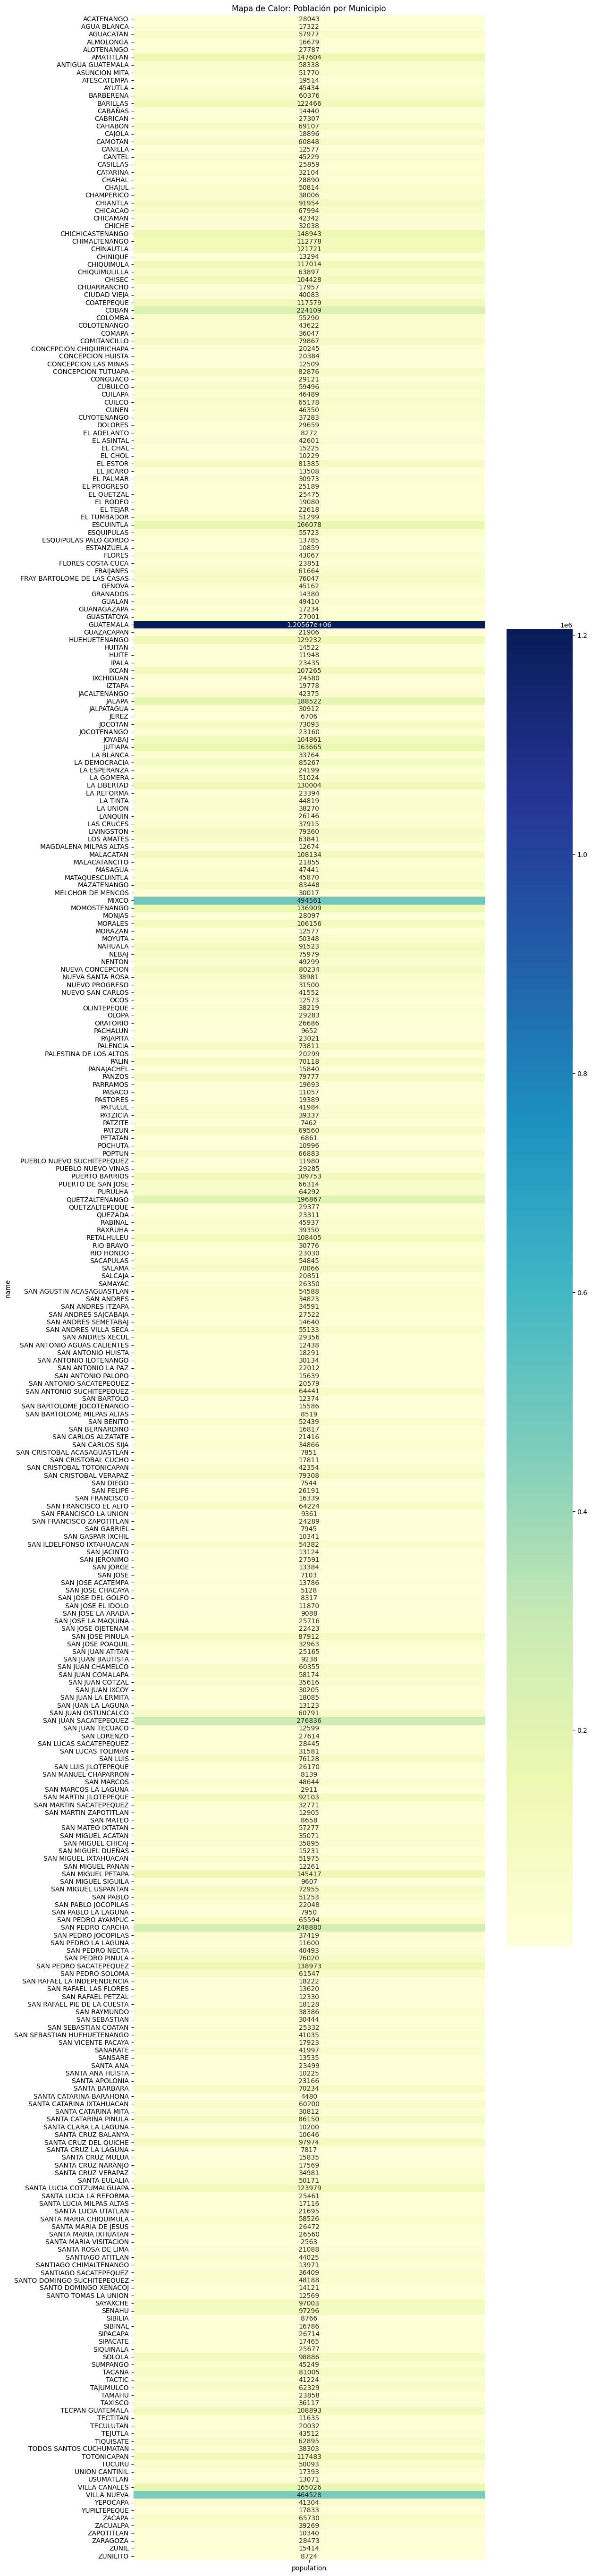

In [109]:

# Crear un mapa de calor con seaborn
plt.figure(figsize=(12, 70)) 
sns.heatmap(df_municipality.pivot_table(index='name', values='population', aggfunc='sum'), cmap='YlGnBu', annot=True, fmt='g')

# Añadir título
plt.title('Mapa de Calor: Población por Municipio')

# Mostrar el gráfico
plt.show()

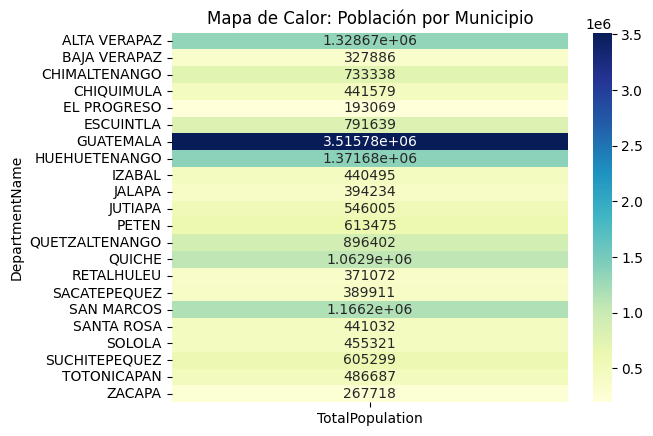

In [110]:
# Crear un mapa de calor con seaborn
sns.heatmap(df_department_population.pivot_table(index='DepartmentName', values='TotalPopulation', aggfunc='sum'), cmap='YlGnBu', annot=True, fmt='g')

# Añadir título
plt.title('Mapa de Calor: Población por Municipio')

# Mostrar el gráfico
plt.show()